In [11]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
movies_raw = pd.read_csv('/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/Main Database/all_genres_vs_budgets.csv')
movies_raw.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


In [13]:
producers = pd.read_csv('/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/notebooks/producers.csv')
producers.head()

,movie_id,primary_title,start_year,genres,person_id,category,job,primary_name
0,tt0069049,The Other Side of the Wind,2018,Drama,nm0550881,producer,producer,Frank Marshall
1,tt3263904,Sully,2016,"Biography,Drama",nm0550881,producer,producer,Frank Marshall
2,tt3691740,The BFG,2016,"Adventure,Family,Fantasy",nm0550881,producer,producer,Frank Marshall
3,tt4196776,Jason Bourne,2016,"Action,Thriller",nm0550881,producer,producer,Frank Marshall
4,tt5719232,Finding Oscar,2016,"Crime,Documentary,Drama",nm0550881,producer,producer,Frank Marshall


In [22]:
moviesa = movies_raw.merge(producers,
                          left_on='movie',
                          right_on = 'primary_title',
                          how ='inner')
moviesa.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,movie_id,primary_title,start_year,genres,person_id,category,job,primary_name
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",tt2527336,Star Wars: The Last Jedi,2017,"Action,Adventure,Fantasy",nm0005086,producer,producer,Kathleen Kennedy
1,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",tt2527336,Star Wars: The Last Jedi,2017,"Action,Adventure,Fantasy",nm0074851,producer,producer,Ram Bergman
2,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",tt3778644,Solo: A Star Wars Story,2018,"Action,Adventure,Fantasy",nm0005086,producer,producer,Kathleen Kennedy
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",tt3778644,Solo: A Star Wars Story,2018,"Action,Adventure,Fantasy",nm0004012,producer,producer,Simon Emanuel
4,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",tt4630562,The Fate of the Furious,2017,"Action,Crime,Thriller",nm0605775,producer,producer,Neal H. Moritz


In [24]:
moviesa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 900
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              901 non-null    object
 1   production_budget  901 non-null    int64 
 2   worldwide_gross    901 non-null    int64 
 3   release_month      901 non-null    int64 
 4   release_year_x     901 non-null    int64 
 5   genre_ids          901 non-null    object
 6   movie_id           901 non-null    object
 7   primary_title      901 non-null    object
 8   start_year         901 non-null    int64 
 9   genres             901 non-null    object
 10  person_id          901 non-null    object
 11  category           901 non-null    object
 12  job                901 non-null    object
 13  primary_name       901 non-null    object
dtypes: int64(5), object(9)
memory usage: 105.6+ KB


In [28]:
movies = moviesa[['movie', 'production_budget', 'worldwide_gross', 'release_month', 'release_year_x', 'genre_ids', 'primary_name', 'movie_id']]
movies.rename(columns = {'release_year_x': 'release_year', 'primary_name': 'producer'})
movies.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,primary_name,movie_id
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Kathleen Kennedy,tt2527336
1,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Ram Bergman,tt2527336
2,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Kathleen Kennedy,tt3778644
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Simon Emanuel,tt3778644
4,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",Neal H. Moritz,tt4630562


# WHAT IS HIGHEST GROSSING MOVIE


In [44]:
movies_gross = movies_raw.sort_values(by=['worldwide_gross'], ascending= False)
movies_gross = movies_gross.head(10)
movies_gross = movies_gross[['movie', 'worldwide_gross']]
movies_gross

,movie,worldwide_gross
1,Avengers: Infinity War,2048134200
9,Black Panther,1348258224
0,Star Wars: The Last Jedi,1316721747
30,Jurassic World: Fallen Kingdom,1305772799
34,Beauty and the Beast,1259199706
10,Incredibles 2,1242520711
6,The Fate of the Furious,1234846267
35,Aquaman,1146894640
4,Captain America: Civil War,1140069413
11,Rogue One: A Star Wars Story,1049102856


# ACTION/ADVENTURE

https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

## Sort for Genre ID

Action          28

Adventure       12


### What genres are assigned to highest grossing movies from budgets csv?

Below I'm triple checking that highest grossing movies are mostly action/adventure based on prior ip

In [42]:
movies.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,primary_name,movie_id
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Kathleen Kennedy,tt2527336
1,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Ram Bergman,tt2527336
2,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Kathleen Kennedy,tt3778644
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Simon Emanuel,tt3778644
4,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",Neal H. Moritz,tt4630562


In [43]:
movies.describe()

,production_budget,worldwide_gross,release_month,release_year_x
count,901.00000,901.00000,901.00000,901.00000
mean,35731689.23418,114747567.35294,6.89678,2016.95893
std,45716655.20380,197502519.68799,3.54924,0.85341
min,100000.00000,0.00000,1.00000,2016.00000
25%,9000000.00000,10116816.00000,4.00000,2016.00000
50%,20000000.00000,40749230.00000,7.00000,2017.00000
75%,42000000.00000,119024536.00000,10.00000,2018.00000
max,317000000.00000,1348258224.00000,12.00000,2019.00000


In [37]:
#scraping out action movies that did not have worldwide release
action = movies[(movies['worldwide_gross'] > 0)]
action

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,primary_name,movie_id
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Kathleen Kennedy,tt2527336
1,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Ram Bergman,tt2527336
2,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Kathleen Kennedy,tt3778644
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Simon Emanuel,tt3778644
4,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",Neal H. Moritz,tt4630562
...,...,...,...,...,...,...,...,...
896,Sleight,250000,3934450,4,2017,"[18, 53, 28, 878]",Sean Tabibian,tt4573516
897,Sleight,250000,3934450,4,2017,"[18, 53, 28, 878]",Eric B. Fleischman,tt4573516
898,A Ghost Story,100000,2769782,7,2017,"[18, 14, 10749]",Toby Halbrooks,tt6265828
899,A Ghost Story,100000,2769782,7,2017,"[18, 14, 10749]",James M. Johnston,tt6265828


In [34]:
action = action[(action['genre_ids'].str.contains("12")) | (action['genre_ids'].str.contains("28"))]
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


## Not for kids/family
I'm going to scrape out the ones that are also made for young kids in mind - like lego franchise because that will be explicitly covered by Russel


Animation       16

Family          10751

In [35]:
action = action[(~action["genre_ids"].str.contains('10751')) | (~action["genre_ids"].str.contains('16'))]
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


In [110]:
action['profit'] = action['worldwide_gross'] - action['production_budget']
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,profit
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",999721747
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]",1748134200
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]",355945209
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",118151347
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]",890069413


In [111]:
action.describe()

,production_budget,worldwide_gross,release_month,release_year_x,profit
count,151.00000,151.00000,151.00000,151.00000,151.00000
mean,87576490.06623,282158198.82119,5.98675,2016.98675,194581708.75497
std,75179364.14734,356099813.97569,3.34462,0.87929,301551229.48904
min,250000.00000,528.00000,1.00000,2016.00000,-75978328.00000
25%,30000000.00000,40348933.50000,3.00000,2016.00000,4064747.00000
50%,60000000.00000,136617305.00000,6.00000,2017.00000,68345423.00000
75%,147000000.00000,388660385.50000,8.00000,2018.00000,269811735.50000
max,317000000.00000,2048134200.00000,12.00000,2019.00000,1748134200.00000


# WHAT ARE GROSSING ACTION MOVIES

In [112]:
action_highest_gross = action[(action['worldwide_gross'] >= 388660385)]
ahgsort = action_highest_gross.sort_values(by='worldwide_gross', ascending = False)
ahgsort1 = ahgsort.sort_values(by=['worldwide_gross'], ascending= False)
ahgsort1.head(10)

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,profit
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]",1748134200
9,Black Panther,200000000,1348258224,2,2018,"[28, 12, 14, 878]",1148258224
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",999721747
30,Jurassic World: Fallen Kingdom,170000000,1305772799,6,2018,"[28, 12, 878]",1135772799
6,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",984846267
35,Aquaman,160000000,1146894640,12,2018,"[28, 12, 14]",986894640
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]",890069413
11,Rogue One: A Star Wars Story,200000000,1049102856,12,2016,"[28, 12, 878]",849102856
77,Jumanji: Welcome to the Jungle,90000000,964496193,12,2017,"[28, 12, 35, 14]",874496193
24,The Jungle Book,175000000,962854547,4,2016,"[12, 18, 10751, 14]",787854547


In [113]:
ahgsort2 = ahgsort.sort_values(by=['profit'], ascending=False)
ahgsort2.head(10)

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids,profit
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]",1748134200
9,Black Panther,200000000,1348258224,2,2018,"[28, 12, 14, 878]",1148258224
30,Jurassic World: Fallen Kingdom,170000000,1305772799,6,2018,"[28, 12, 878]",1135772799
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",999721747
35,Aquaman,160000000,1146894640,12,2018,"[28, 12, 14]",986894640
6,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",984846267
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]",890069413
77,Jumanji: Welcome to the Jungle,90000000,964496193,12,2017,"[28, 12, 35, 14]",874496193
11,Rogue One: A Star Wars Story,200000000,1049102856,12,2016,"[28, 12, 878]",849102856
24,The Jungle Book,175000000,962854547,4,2016,"[12, 18, 10751, 14]",787854547


# BUDGETS OF ACTION/ADVENTURE: SPEND MONEY AND MAKE A SPLASH

In [54]:
action.head(20)

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"
5,Batman v Superman: Dawn of Justice,250000000,867500281,3,2016,"[28, 12, 14]"
6,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]"
7,Pirates of the Caribbean: Dead Men Tell No Tales,230000000,788241137,5,2017,"[12, 28, 14, 35]"
8,Transformers: The Last Knight,217000000,602893340,6,2017,"[28, 878, 53, 12]"
9,Black Panther,200000000,1348258224,2,2018,"[28, 12, 14, 878]"


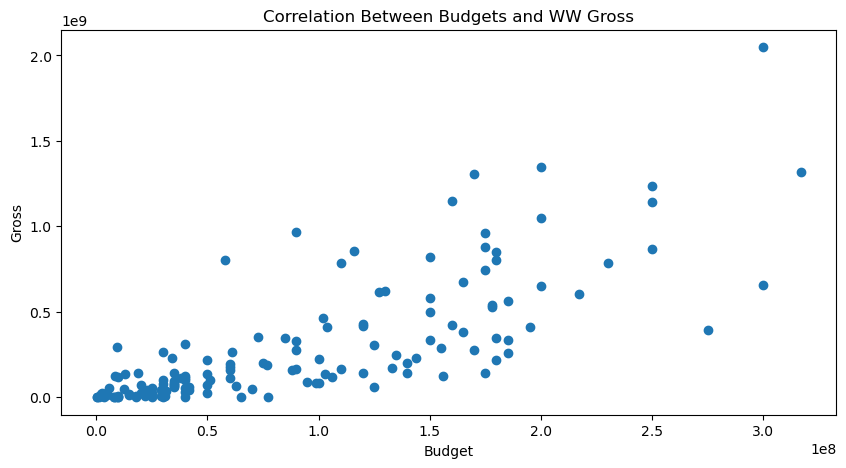

In [39]:
x = action['production_budget']
y = action['worldwide_gross']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and WW Gross')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross');

Slight positive correlation between budget and ww gross - not predicted to be very profitable

# ACTION/ADVENTURE TIME OF YEAR RELEASE - DOES IT MATTER? 

In [108]:
! ls

Beyza-Genre&Rating.ipynb Leo.ipynb                movies_gross1.csv
Horror.csv               Russell.ipynb            movies_gross2.csv
Jake.ipynb               exploratory.ipynb        russmasterdata.ipynb
Leo 2.ipynb              final.ipynb              timegraph.csv
Leo 3.ipynb              movies_gross.csv


In [107]:
time_graph = action[['movie', 'release_month']]
time_graph.to_csv('timegraph.csv', index=False)

In [115]:
action['release_month'].value_counts()

6     17
1     17
7     16
3     15
4     14
5     13
8     13
12    11
2     10
11     9
10     8
9      8
Name: release_month, dtype: int64

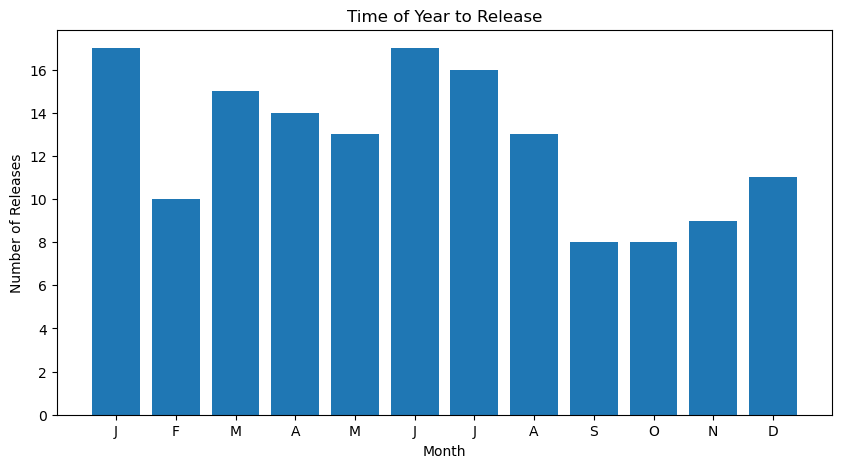

In [103]:
x = action['release_month'].value_counts().sort_index().index
y = action['release_month'].value_counts().sort_index().values
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Time of Year to Release')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Releases')
ax.set_xticks(range(1,13))
ax.set_xticklabels(list('JFMAMJJASOND'));